In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv


In [5]:
data=pd.read_csv('../input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv')
data4_viz=pd.read_csv('../input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv')

# Meta-Data Details


ID	= ID of each client

LIMIT_BAL	= Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX	= Gender (1=male, 2=female)

EDUCATION	= (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

* MARRIAGE=	 Marital status (1=married, 2=single, 3=others)

AGE	 =Age in years

PAY_0	= Repayment status in September, 2005 (9=payment delay for nine months and above) 

PAY_2	= Repayment status in August, 2005 

PAY_3	= Repayment status in July, 2005 

PAY_4	= Repayment status in June, 2005 
PAY_5	= Repayment status in May, 2005 
PAY_6	= Repayment status in April, 2005 


PAY_O to PAY_6 consist below classes

* -1=Payed  Duly 

* 1= 1 Month  Delay 

* 2=	2 Months  Delay

* 3	=3 Month  Delay

* 9	=9 Months and above  Delay


BILL_AMT1	= Amount of bill statement in September, 2005   

BILL_AMT2	= Amount of bill statement in August, 2005 BILL_AMT3	= Amount of bill statement in July, 2005 

BILL_AMT4	= Amount of bill statement in June, 2005 

BILL_AMT5	= Amount of bill statement in May, 2005 

BILL_AMT6	= Amount of bill statement in April, 2005 

PAY_AMT1	= Amount of previous payment in September, 2005 

PAY_AMT2	= Amount of previous payment in August, 2005 

PAY_AMT3	= Amount of previous payment in July, 2005 

PAY_AMT4	= Amount of previous payment in June, 2005 

PAY_AMT5	= Amount of previous payment in May, 2005 

PAY_AMT6	= Amount of previous payment in April, 2005 

default.payment.next.month	= Default payment (1=yes, 0=no) (Target Variable)




In [6]:
data4_viz.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [7]:
data4_viz['SEX'] = data4_viz['SEX'].map( {1:'male', 2:'female'} )
data4_viz['default.payment.next.month'] = data4_viz['default.payment.next.month'].map( {1:'yes', 0:'no'} )
data4_viz['EDUCATION'] = data4_viz['EDUCATION'].map( {1:'graduate school', 2:'university', 3:'high school', 4:'others', 5:'unknown', 6:'unknown'} )
data4_viz['MARRIAGE'] = data4_viz['MARRIAGE'].map( {1:'married', 2:'single', 3:'others'} ) 
paymen_status={-1:'Payed Duly',
               -2:'no consumption',
               0:'Revolving Credit',
               1: '1 Month Delay',
               2: '2 Months Delay',
               3 :'3 Month Delay',
                4 :'4 Month Delay',
                5 :'5 Month Delay',
                6 :'6 Month Delay',
                7 :'7 Month Delay',
                8 :'8 Month Delay',
               9 :'9 Months and above Delay'}

def replacethestatus(select_column):
    for i in select_column:
        data4_viz[i]=data4_viz[i].map(paymen_status)

pay_cols=list(data4_viz.iloc[:,6:12].columns)
replacethestatus(pay_cols)
data4_viz.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,female,university,married,24,2 Months Delay,2 Months Delay,Payed Duly,Payed Duly,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,yes
1,2,120000.0,female,university,single,26,Payed Duly,2 Months Delay,Revolving Credit,Revolving Credit,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,yes
2,3,90000.0,female,university,single,34,Revolving Credit,Revolving Credit,Revolving Credit,Revolving Credit,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,no
3,4,50000.0,female,university,married,37,Revolving Credit,Revolving Credit,Revolving Credit,Revolving Credit,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,no
4,5,50000.0,male,university,married,57,Payed Duly,Revolving Credit,Payed Duly,Revolving Credit,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,no


In [8]:
months=['Sept','Aug','July','June','May','Apr']
new_cols=[]
prefix=['Status_', 'Bill_' ,'Pay_']
for i in prefix:
    for j in months:
     s_=i+j
     new_cols.append(s_)
new_cols
org_cols=list(data.iloc[:,6:-1].columns)
rename_cols = {i:j for i,j in zip(org_cols,new_cols)}
data4_viz.rename(columns=rename_cols, inplace=True)
data4_viz.head(4)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Status_Sept,Status_Aug,Status_July,Status_June,...,Bill_June,Bill_May,Bill_Apr,Pay_Sept,Pay_Aug,Pay_July,Pay_June,Pay_May,Pay_Apr,default.payment.next.month
0,1,20000.0,female,university,married,24,2 Months Delay,2 Months Delay,Payed Duly,Payed Duly,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,yes
1,2,120000.0,female,university,single,26,Payed Duly,2 Months Delay,Revolving Credit,Revolving Credit,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,yes
2,3,90000.0,female,university,single,34,Revolving Credit,Revolving Credit,Revolving Credit,Revolving Credit,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,no
3,4,50000.0,female,university,married,37,Revolving Credit,Revolving Credit,Revolving Credit,Revolving Credit,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,no


# Data Visualization

In [9]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

In [39]:
data4_viz.head(4)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Status_Sept,Status_Aug,Status_July,Status_June,...,Bill_June,Bill_May,Bill_Apr,Pay_Sept,Pay_Aug,Pay_July,Pay_June,Pay_May,Pay_Apr,default.payment.next.month
0,1,20000.0,female,university,married,24,2 Months Delay,2 Months Delay,Payed Duly,Payed Duly,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,yes
1,2,120000.0,female,university,single,26,Payed Duly,2 Months Delay,Revolving Credit,Revolving Credit,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,yes
2,3,90000.0,female,university,single,34,Revolving Credit,Revolving Credit,Revolving Credit,Revolving Credit,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,no
3,4,50000.0,female,university,married,37,Revolving Credit,Revolving Credit,Revolving Credit,Revolving Credit,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,no


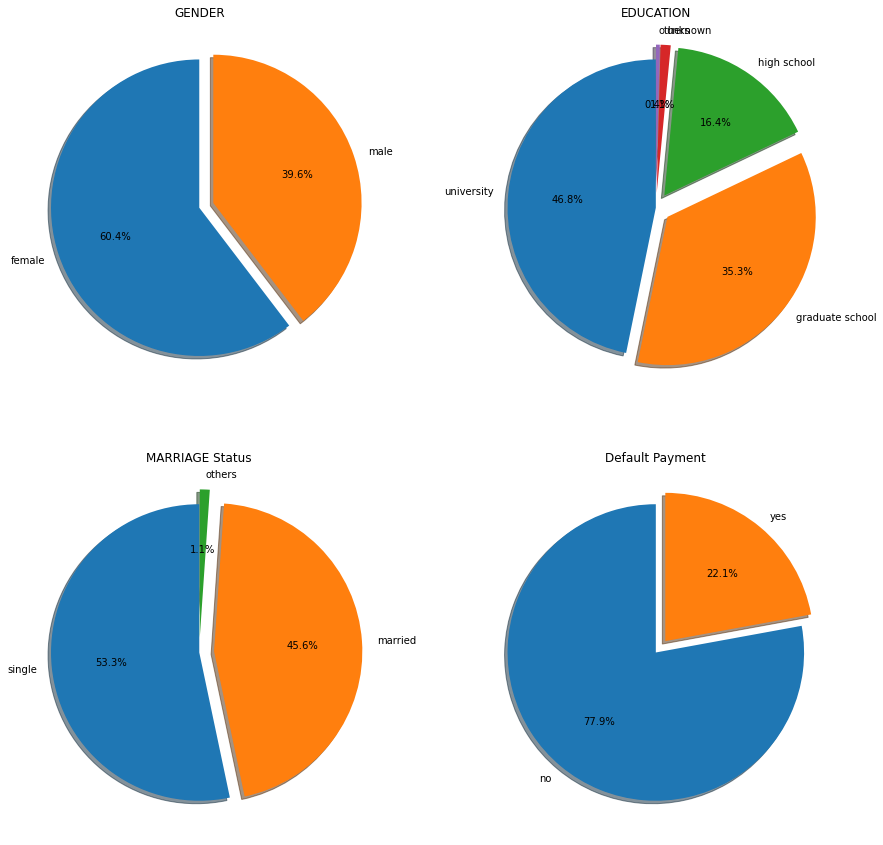

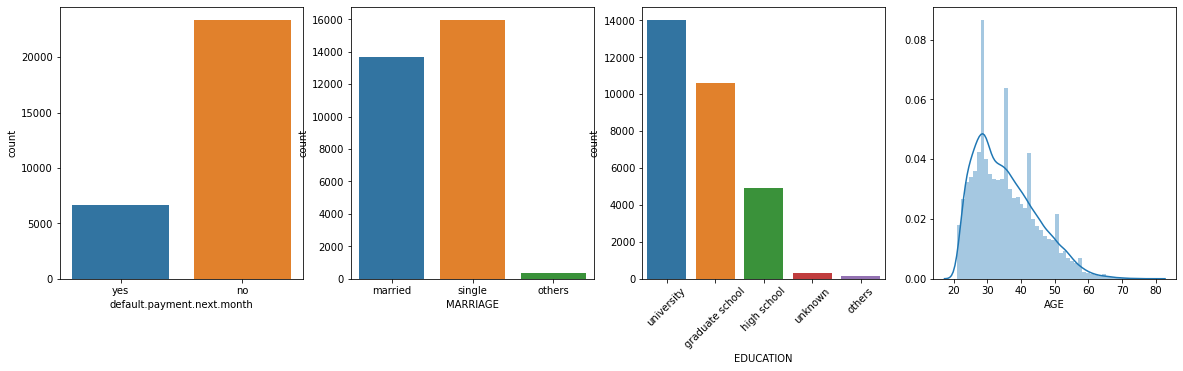

In [87]:
explode = (0, 0.1,0.1,0.1,0.1,0,0.1)
def get_values(col_name):
    return list(data4_viz[str(col_name)].value_counts().to_frame().reset_index()[str(col_name)])
def get_label(col_name):
    return list(data4_viz[str(col_name)].value_counts().to_frame().reset_index()['index'])
def get_explode(col_name):
    return explode[0:len(data4_viz[str(col_name)].value_counts().to_frame())]

fig, axs = plt.subplots(2, 2,figsize=(15,15))


axs[0, 0].pie(get_values('SEX'), explode=get_explode('SEX'), labels=get_label('SEX'), autopct='%1.1f%%',
        shadow=True, startangle=90,)

axs[0,0].set_title('GENDER')
axs[0, 1].pie(get_values('EDUCATION'), explode=get_explode('EDUCATION'), labels=get_label('EDUCATION'), autopct='%1.1f%%',
        shadow=True, startangle=90,)
axs[0,1].set_title('EDUCATION')

axs[1, 0].pie(get_values('MARRIAGE'), explode=get_explode('MARRIAGE'), labels=get_label('MARRIAGE'), autopct='%1.1f%%',
        shadow=True, startangle=90,)
axs[1,0].set_title('MARRIAGE Status')

axs[1, 1].pie(get_values('default.payment.next.month'), explode=get_explode('default.payment.next.month'), labels=get_label('default.payment.next.month'), autopct='%1.1f%%',
        shadow=True, startangle=90,)
axs[1,1].set_title('Default Payment')


f, axes = plt.subplots(1, 4,figsize=(20,5))
sns.countplot(x="default.payment.next.month", data=data4_viz,ax=axes[0])
sns.countplot(x="MARRIAGE", data=data4_viz,ax=axes[1])
chart=sns.countplot(x="EDUCATION", data=data4_viz,ax=axes[2])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
sns.distplot(data4_viz['AGE'],ax=axes[3])

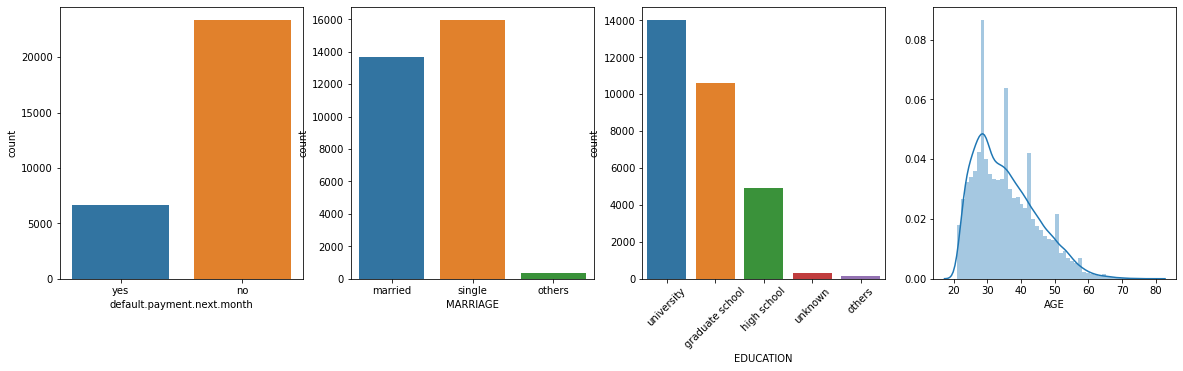

In [88]:
fig = px.histogram(data4_viz, x="LIMIT_BAL", color="SEX",nbins=60)
fig.show()

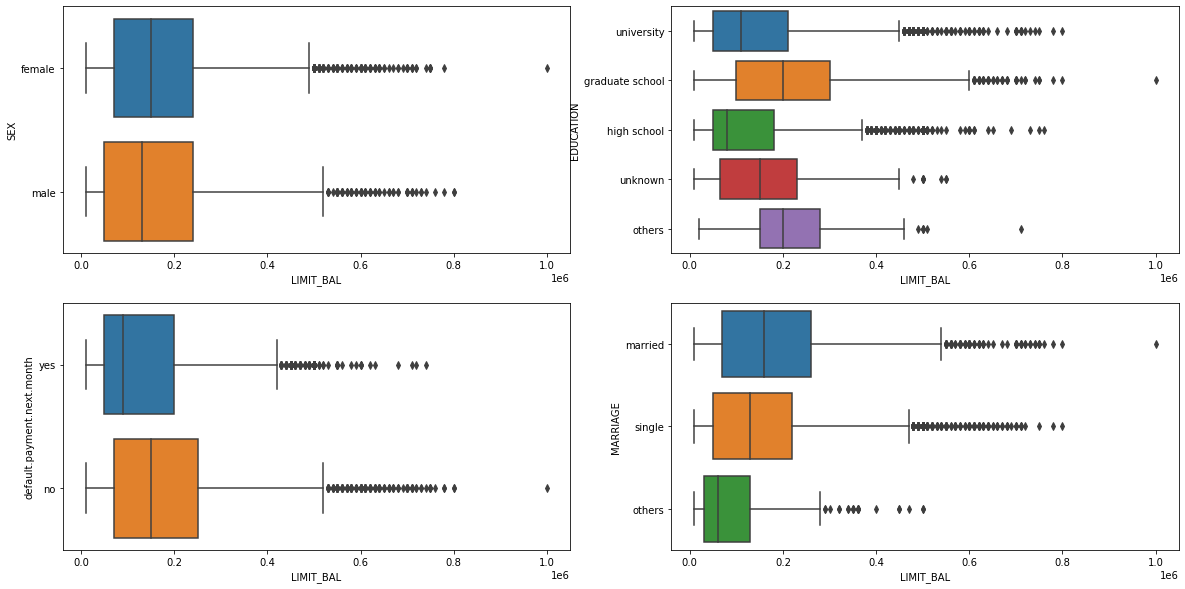

In [115]:
f, axes = plt.subplots(2, 2,figsize=(20,10))
sns.boxplot(  y="SEX", x= "LIMIT_BAL", data=data4_viz,  orient='h' , ax=axes[0,0])
sns.boxplot(  y="EDUCATION", x= "LIMIT_BAL", data=data4_viz,  orient='h' , ax=axes[0,1])
sns.boxplot(  y="MARRIAGE", x= "LIMIT_BAL", data=data4_viz,  orient='h' , ax=axes[1,1])
sns.boxplot(  y="default.payment.next.month", x= "LIMIT_BAL", data=data4_viz,  orient='h' , ax=axes[1,0])

             we can see in above histogram there are few outliers presents in term of limit balace

In [89]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=3, cols=2, start_cell="bottom-left",subplot_titles=("Bill_Sept","Bill_Aug", "Bill_July",'Bill_June', 'Bill_May', 'Bill_Apr'))


fig.add_trace(go.Histogram(x=data4_viz[new_cols[6]]),
              row=1, col=1)

fig.add_trace(go.Histogram(x=data4_viz[new_cols[7]]),
              row=1, col=2)

fig.add_trace(go.Histogram(x=data4_viz[new_cols[8]]),
              row=2, col=1)

fig.add_trace(go.Histogram(x=data4_viz[new_cols[9]]),
              row=2, col=2)
fig.add_trace(go.Histogram(x=data4_viz[new_cols[10]]),
              row=3, col=1)

fig.add_trace(go.Histogram(x=data4_viz[new_cols[11]]),
              row=3, col=2)


fig.show()

In [116]:
fig = make_subplots(rows=3, cols=2, start_cell="bottom-left",subplot_titles=('Pay_Sept', 'Pay_Aug', 'Pay_July', 'Pay_June', 'Pay_May', 'Pay_Apr'))

fig.add_trace(go.Histogram(x=data4_viz[new_cols[12]],nbinsx=30),
              row=1, col=1)

fig.add_trace(go.Histogram(x=data4_viz[new_cols[13]],nbinsx=30),
              row=1, col=2)

fig.add_trace(go.Histogram(x=data4_viz[new_cols[14]],nbinsx=30),
              row=2, col=1)

fig.add_trace(go.Histogram(x=data4_viz[new_cols[15]],nbinsx=30),
              row=2, col=2)
fig.add_trace(go.Histogram(x=data4_viz[new_cols[16]],nbinsx=30),
              row=3, col=1)

fig.add_trace(go.Histogram(x=data4_viz[new_cols[17]],nbinsx=30),
              row=3, col=2)


fig.show()

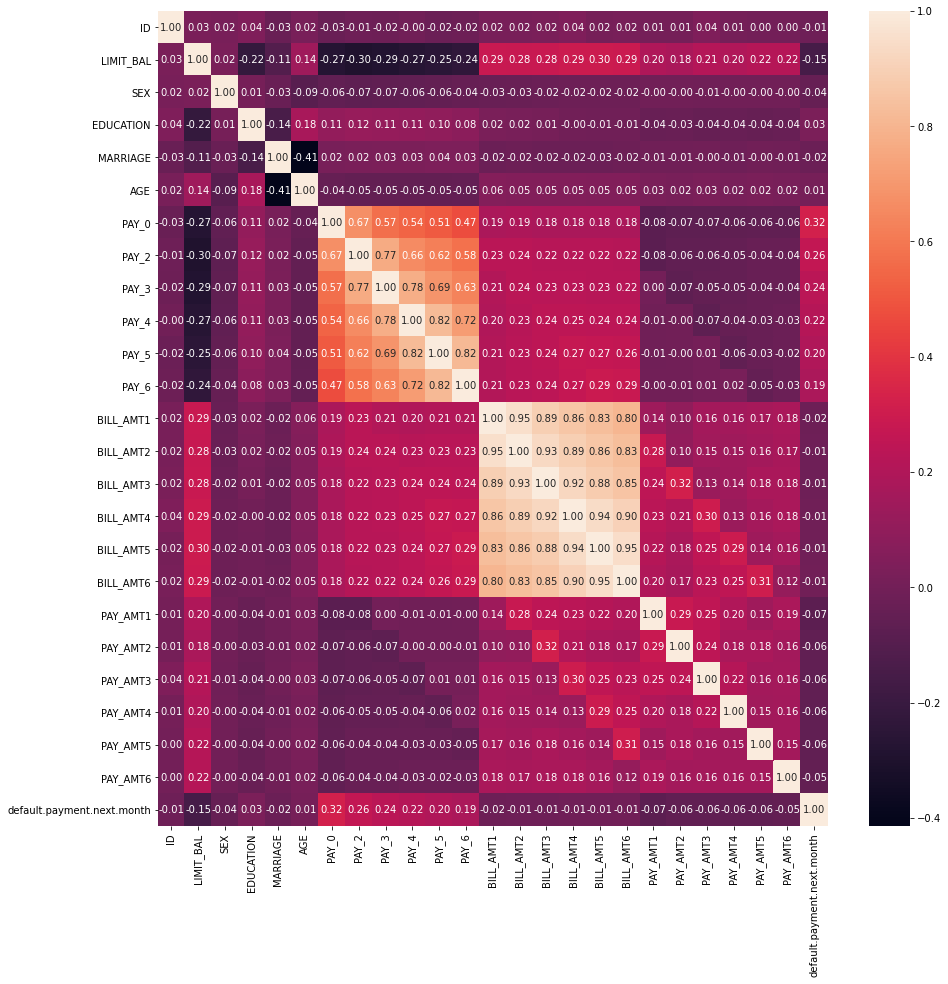

In [119]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

In [104]:
scale_columns=list(data.iloc[:,12:-1].columns)
scale_columns.extend(['LIMIT_BAL','AGE'])
# scale_columns.append('AGE')
scale_columns

['BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'LIMIT_BAL',
 'AGE']

In [120]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for i in scale_columns:
    scaler.fit(np.array(data[i]).reshape(-1,1))
    data[i] = scaler.transform(np.array(data[i]).reshape(-1,1))

In [122]:
data1=data.drop(columns='ID', axis=1)
data1.head(4)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,-1.136720,2,2,1,-1.246020,2,2,-1,-1,-2,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
1,-0.365981,2,2,2,-1.029047,-1,2,0,0,0,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
2,-0.597202,2,2,2,-0.161156,0,0,0,0,0,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
3,-0.905498,2,2,1,0.164303,0,0,0,0,0,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0


In [123]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data1, test_size=0.2)
X_train = train[train.columns[0:-1]]
y_train = train['default.payment.next.month']
X_test = test[test.columns[0:-1]] 
y_test = test['default.payment.next.month']

print('Total Observations in train set are: '+str(len(train)))
print('Total Observations in train set are: '+str(len(test)))

print('Total Observations in X_train set are: '+str((X_train.shape)))
print('Total Observations in X_test set are: '+str((X_test.shape)))

Total Observations in train set are: 24000
Total Observations in train set are: 6000
Total Observations in X_train set are: (24000, 23)
Total Observations in X_test set are: (6000, 23)


In [ ]:
def feature_eng(df, numerical_cols):
    start_time = time.perf_counter()
    
    for col in tqdm(numerical_cols):
        col_sqrt = 'SQRT_' + col
        df[col_sqrt] = df[col].apply(lambda x: round(np.sqrt(x), 2))
        col_cube = 'CBRT_' + col
        df[col_sqrt] = df[col].apply(lambda x: round(np.cbrt(x), 2))
        col_exp = 'EXP_' + col
        df[col_exp] = df[col].apply(lambda x: round(np.exp(x), 2))  
        
    for col1 in tqdm(numerical_cols):
        for col2 in numerical_cols:
            if col1 == col2:
                continue
            sum_col = 'SUM_' + col1 + '_' + col2
            df[sum_col] = round(df[col1] + df[col2], 2)

 

            diff_col = 'DIFF_' + col1 + '_' + col2
            df[diff_col] = round(df[col1] - df[col2], 2)

 

            avg_col = 'AVG_' + col1 + '_' + col2
            df[avg_col] = round(df[[col1, col2]].mean(axis=1), 2)

 

            ratio_col = 'RATIO_' + col1 + '_' + col2
            df[ratio_col] = round(df[col1]/df[col2], 2)

 

    end_time = time.perf_counter()      

 

    print('Feature Engineering completed.')
    print('Time taken %.2f mins' %((end_time-start_time)/60))

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
svc_model = SVC(random_state=0).fit(X_train,y_train)

In [ ]:
print("train score - " + str(svc_model.score(X_train, y_train)))
print("test score - " + str(svc_model.score(X_test, y_test)))

In [ ]:
X_train

In [ ]:
params = {'C': [0.001, 0.01, 0.1, 1],
               'gamma': [0.001, 0.01, 0.1, 1]}

In [ ]:
# grid_search = GridSearchCV(SVC(random_state=0), params, cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# print("train score - " + str(grid_search.score(X_train, y_train)))
# print("test score - " + str(grid_search.score(X_test, y_test)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

In [ ]:
CV_rfc

In [ ]:
print(grid_search.best_params_)

In [ ]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

In [ ]:
rfc1.fit(X_train, y_train)
pred=rfc1.predict(X_test)


In [ ]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))